In [1]:
import sys
#!{sys.executable} -m pip install pandas-profiling

In [3]:
#import pandas_profiling as pp

In [5]:
%matplotlib inline  
import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import seaborn as sns
import datetime  
from sklearn.linear_model import LogisticRegression #  Logistic Regression (aka logit) classifier in linear model
import joblib  #Joblib is a set of tools to provide lightweight pipelining in Python (Avoid computing twice the same thing)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
                                    # GridSearchCV - Implements a “fit” and a “score” method
                                    # train_test_split - Split arrays or matrices into random train and test subsets
                                    # cross_val_score - Evaluate a score by cross-validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report
                                    # Differnt metrics to evaluate the model 
#import pandas_profiling as pp   # simple and fast exploratory data analysis of a Pandas Dataframe
from sklearn.preprocessing import LabelEncoder # Labeling the columns with 0 & 1

In [6]:
def plot_roc_curve(y_train_actual, train_pred_prob, y_test_actual, test_pred_prob, *args):
    '''
    Generate the train & test roc curve
    '''

    AUC_Train = roc_auc_score(y_train_actual, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_actual, test_pred_prob)

    if len(args) == 0:
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        roc_plot(fpr, tpr, fpr_tst, tpr_tst)

    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr, tpr, fpr_tst, tpr_tst, fpr_val, tpr_val)
def roc_plot(fpr, tpr, fpr_tst, tpr_tst, *args):
    '''
    Generates roc plot
    '''

    fig = plt.plot(fpr, tpr, label='Train')
    fig = plt.plot(fpr_tst, tpr_tst, label='Test')

    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    else:
        fig = plt.plot(args[0], args[1], label='Validation')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

In [7]:
Tdata = pd.read_csv("c:/python/RidgeRegression/TelcoCustomerChurn.csv")

In [8]:
print ("Rows     : " ,Tdata.shape[0])
print ("Columns  : " ,Tdata.shape[1])

def df_summary(df):
  df_U = df.nunique()
  df_M = df.isnull().sum()
  df_I = df.dtypes
  df_U = df_U.to_frame().reset_index()
  df_M = df_M.to_frame().reset_index()
  df_I = df_I.to_frame().reset_index()
  df_U = df_U.rename(columns= {0: 'Unique Data'})
  df_M = df_M.rename(columns= {0: 'Missing Data'})
  df_I = df_I.rename(columns= {0: 'Data Types'})
  output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
  return output;

Rows     :  7043
Columns  :  21


In [9]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


In [10]:
Tdata.V18.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: V18, dtype: object

In [11]:
Tdata.V18= pd.to_numeric(Tdata.V18, errors='coerce')
Tdata.V18.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: V18, dtype: float64

In [12]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


In [13]:
Tdata['V18'].fillna((Tdata['V18'].mean()), inplace=True)
Tdata['V18'].isnull().sum()
#df_summary(Tdata)

0

In [14]:
Tdata.drop('customerID',axis=1, inplace=True)
Tdata.columns

Index(['gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'Churn'],
      dtype='object')

In [15]:
#Lets seprate Numerical columns and object columns seperatly
Num_cols = Tdata.select_dtypes(include=['float64','int64']).columns.tolist()
Cat_cols = Tdata.select_dtypes(include=['object']).columns.tolist()
print("Number columns : ",Num_cols , "Catogarical columns :" ,Cat_cols,sep="\n")

Number columns : 
['V1', 'V4', 'V17', 'V18']
Catogarical columns :
['gender', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'Churn']


In [16]:
#Lets see all the categorical & Numerical information one by one
#Numerical variables we can use describe function directly
Tdata[Num_cols].describe()

,V1,V4,V17,V18
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


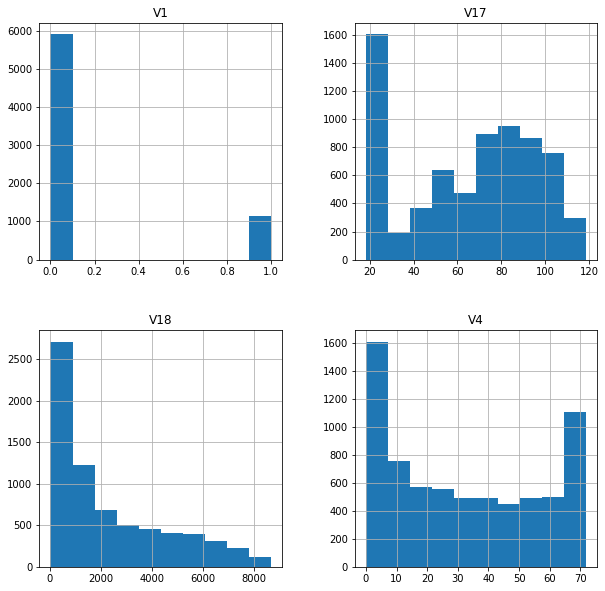

In [17]:
Tdata[Num_cols].hist(figsize = (10,10));

In [18]:
#Data is skewed in V17 & V18 variables
#Lets see the binaary and multiclass variables
#Creating function to see all the object data type variables using single function

In [19]:
def cat_col_desc(data):
    col_list = data.select_dtypes(include=['object']).columns.tolist()
    for i in col_list: 
        print("Variable :", i)
        print("Count of unique values :", len(set( data[i])))
        print("Unique values : " ,set( data[i]))
        print("================================")

In [20]:
cat_col_desc(Tdata)

Variable : gender
Count of unique values : 2
Unique values :  {'Female', 'Male'}
Variable : V2
Count of unique values : 2
Unique values :  {'No', 'Yes'}
Variable : V3
Count of unique values : 2
Unique values :  {'No', 'Yes'}
Variable : V5
Count of unique values : 2
Unique values :  {'No', 'Yes'}
Variable : V6
Count of unique values : 3
Unique values :  {'No phone service', 'Yes', 'No'}
Variable : V7
Count of unique values : 3
Unique values :  {'No', 'DSL', 'Fiber optic'}
Variable : V8
Count of unique values : 3
Unique values :  {'No internet service', 'No', 'Yes'}
Variable : V9
Count of unique values : 3
Unique values :  {'No internet service', 'No', 'Yes'}
Variable : V10
Count of unique values : 3
Unique values :  {'No internet service', 'No', 'Yes'}
Variable : V11
Count of unique values : 3
Unique values :  {'No internet service', 'No', 'Yes'}
Variable : V12
Count of unique values : 3
Unique values :  {'No internet service', 'No', 'Yes'}
Variable : V13
Count of unique values : 3
Uniq

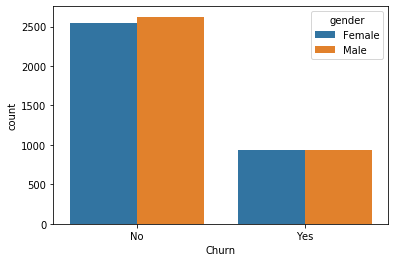

In [21]:
sns.countplot(x="Churn", hue="gender", data=Tdata)

In [22]:
Binary_class = Tdata[Cat_cols].nunique()[Tdata[Cat_cols].nunique() == 2].keys().tolist()
Multi_class =  Tdata[Cat_cols].nunique()[Tdata[Cat_cols].nunique() > 2].keys().tolist()
print(Binary_class)
print(Multi_class)

['gender', 'V2', 'V3', 'V5', 'V15', 'Churn']
['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16']


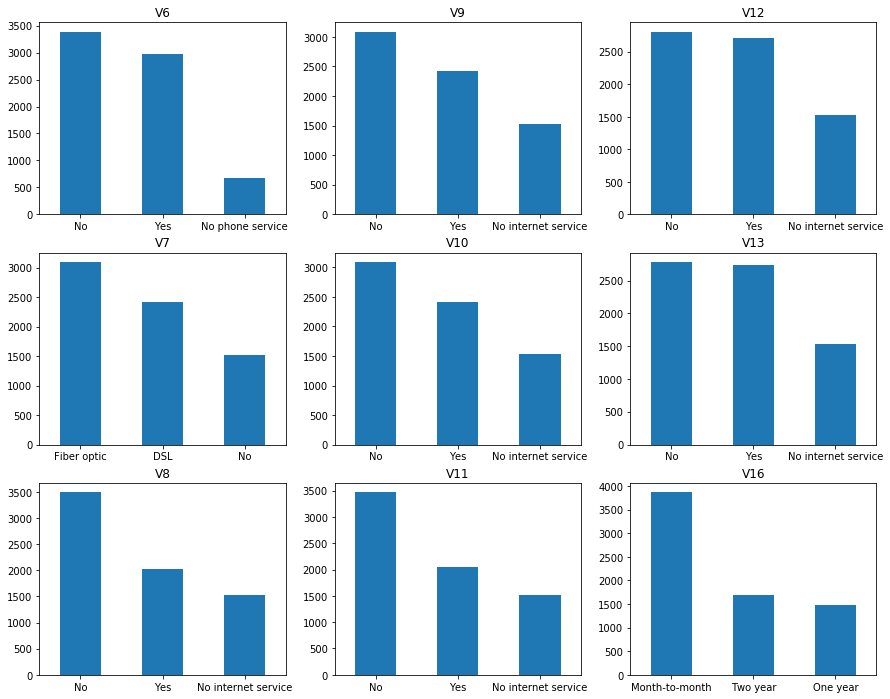

In [23]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(Multi_class):
    if i < 3:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

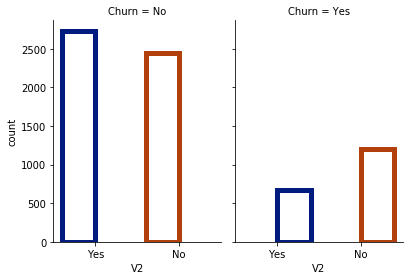

In [24]:
sns.catplot(x="V2", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

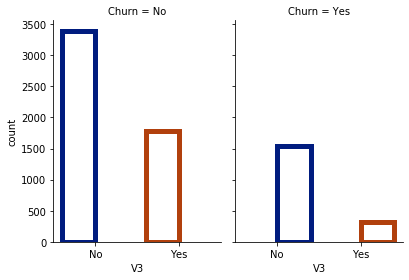

In [25]:
sns.catplot(x="V3", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

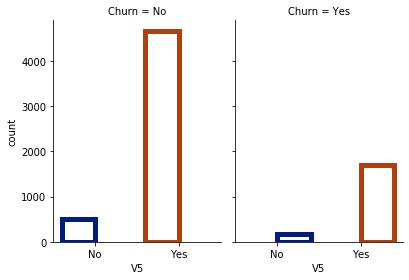

In [26]:
sns.catplot(x="V5", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

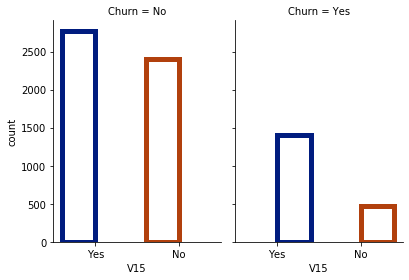

In [27]:
sns.catplot(x="V15", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

In [28]:
#Label encoding Binary columns
le = LabelEncoder()
for i in Binary_class :
    Tdata[i] = le.fit_transform(Tdata[i])

In [29]:
Tdata[Binary_class].shape

(7043, 6)

In [30]:
Tdata[Num_cols].shape

(7043, 4)

In [31]:
# Split multi class catergory columns as dummies  
Tdata_Dummy = pd.get_dummies(Tdata[Multi_class])
Tdata_Dummy.head()

,V6_No,V6_No phone service,V6_Yes,V7_DSL,V7_Fiber optic,V7_No,V8_No,V8_No internet service,V8_Yes,V9_No,...,V13_No,V13_No internet service,V13_Yes,V14_Month-to-month,V14_One year,V14_Two year,V16_Bank transfer (automatic),V16_Credit card (automatic),V16_Electronic check,V16_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [32]:
New_df = pd.concat([Tdata[Num_cols],Tdata[Binary_class],Tdata_Dummy], axis=1)
New_df.shape

(7043, 41)

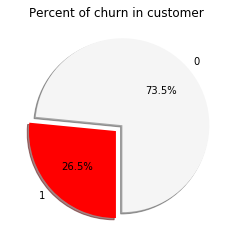

In [33]:
labels =New_df['Churn'].value_counts(sort = True).index
sizes = New_df['Churn'].value_counts(sort = True)

colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

In [34]:
#correlation
#Lets check the correlation between the variables
#correlation
corr = New_df.corr()

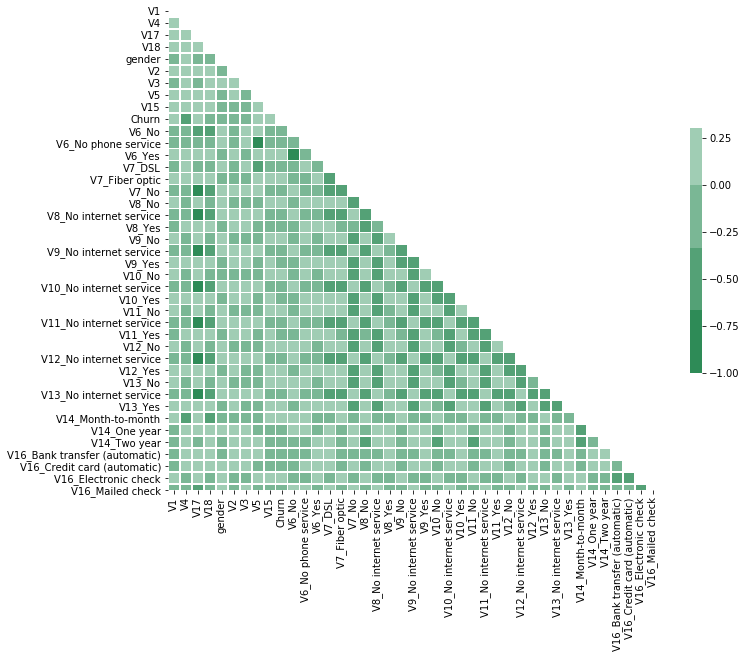

In [35]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap=sns.light_palette("seagreen", reverse=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [36]:
#From the above heatmap we can see the highly correlated variables with dark green associated
#For example
#V4 variable is highly correlated with V14 Month to Month and Churn V17 is correlated with most of the variables with No internete service and NO classes

#Like the above examples we can interpret the variables with most correlated in the same data set

#Important variables

In [37]:
X = New_df.loc[:, New_df.columns != 'Churn']
y = New_df["Churn"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

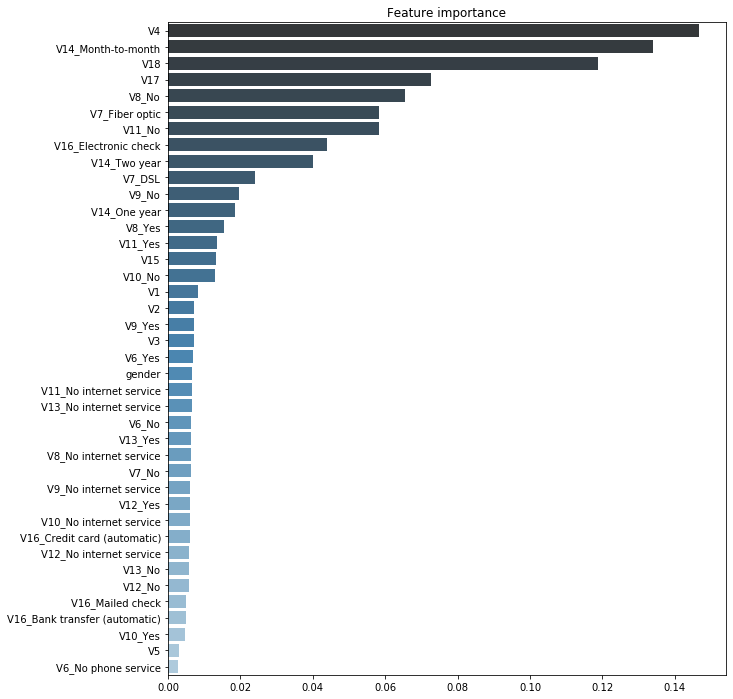

In [38]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(X, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')


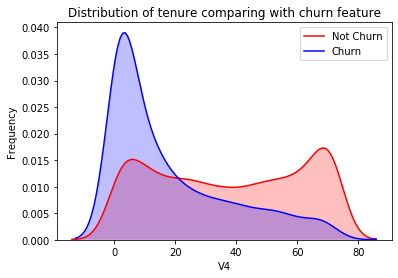

In [39]:
#Since V4 having the highest important variables lets look more closely
# V4 distibution 
g = sns.kdeplot(New_df.V4[(New_df["Churn"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(New_df.V4[(New_df["Churn"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("V4")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

In [40]:
#There is a chnace that customer will churn based on V4 . Lesser the range more chance of churn
print(sorted(New_df["V4"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]


In [41]:
#According to above important variables plot, V17 & V18 may affect to churn probability.
#And seem like customer will not churn if they have lower range
#Split train and test
X = New_df.loc[:, New_df.columns != 'Churn']
y = New_df["Churn"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [42]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 5634.
The number of samples into the test data is 1409.


In [43]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
accuracy = logistic_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy*100)

Logistic Regression accuracy is : 81.12136266855926


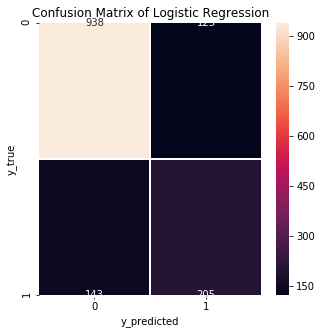

In [45]:
#for Logistic Regression
cm_lr = confusion_matrix(y_test,logistic_model.predict(x_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [46]:
### Using Grid search CV and L2 Penality for logistic regression
# Define Model parameters to tune
model_parameters = {
        'C': [1,10,100,1000],
        'class_weight': ['balanced', None]
    }

In [49]:
from datetime import time
from datetime import timedelta
from datetime import datetime
starttime=datetime.now()

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = LogisticRegression(penalty='l2')
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=500, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='f1')

gscv.fit(x_train, y_train)
endtime=datetime.now()
print(endtime-starttime)
#cv=5 time taken 0:00:01.581181 The best parameter are - {'C': 10, 'class_weight': 'balanced'}
#cv=500 time taken 0:00:18.348093 The best parameter are - {'C': 100, 'class_weight': 'balanced'}
#cv=2000 time taken 9 to 12 The best parameter are - {'C': 100, 'class_weight': 'balanced'}

Fitting 500 folds for each of 8 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  2.9min finished


0:02:53.108936


In [50]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'C': 10, 'class_weight': 'balanced'}


In [51]:
# Re-fit the model with the best parameters
final_mod = LogisticRegression(**gscv.best_params_)
final_mod.fit(x_train,y_train)

LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# View the model coefficients
list(zip(x_train.columns, final_mod.coef_[0]))

[('V1', 0.18422816261389574),
 ('V4', -0.05404048059640286),
 ('V17', 0.007001481586643155),
 ('V18', 0.0002702017096484016),
 ('gender', -0.034761558981736336),
 ('V2', 0.0254797765606081),
 ('V3', -0.0809368071776825),
 ('V5', -0.2427945431295253),
 ('V15', 0.29741598159225247),
 ('V6_No', -0.2073820853486396),
 ('V6_No phone service', 0.1724559390978064),
 ('V6_Yes', -0.03541245778081653),
 ('V7_DSL', -0.2944442362267692),
 ('V7_Fiber optic', 0.29847858551524553),
 ('V7_No', -0.07437295332015098),
 ('V8_No', 0.20632611149272842),
 ('V8_No internet service', -0.07437295332015098),
 ('V8_Yes', -0.2022917622042418),
 ('V9_No', 0.09805810885093437),
 ('V9_No internet service', -0.07437295332015098),
 ('V9_Yes', -0.09402375956245283),
 ('V10_No', 0.07369285084462046),
 ('V10_No internet service', -0.07437295332015098),
 ('V10_Yes', -0.0696585015561462),
 ('V11_No', 0.17657907478515625),
 ('V11_No internet service', -0.07437295332015098),
 ('V11_Yes', -0.17254472549668498),
 ('V12_No', -0

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test,final_mod.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1061
           1       0.50      0.83      0.63       348

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.76      0.77      1409



Train AUC =  0.845355316516176
Test AUC =  0.858189248919367


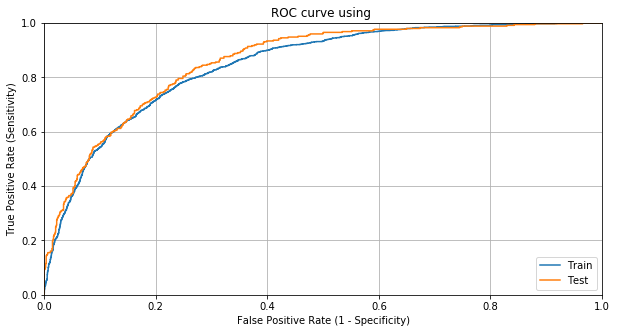

In [54]:
# Generate ROC
plt.subplots(figsize=(10, 5))
train_prob = final_mod.predict_proba(x_train)[:, 1]
test_prob = final_mod.predict_proba(x_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

In [55]:
from skopt.space import Integer, Categorical, Real
from skopt.utils import use_named_args
from skopt import gp_minimize

In [60]:
#Scikit Optimize

# set up hyperparameter space
space = [Integer(1, 10, name='C'),
         #Integer(8, 256, name='n_estimators'),
         Categorical(['balanced', None], name='class_weight'),
         Categorical(['newton-cg', 'lbfgs', 'sag','saga'], name='solver'),
         ]

regressor = LogisticRegression()

from sklearn.model_selection import cross_val_score

@use_named_args(space)
def objective(**params):
    regressor.set_params(**params)
    return -np.mean(cross_val_score(regressor, x_train, y_train, cv=5, n_jobs=1, scoring='neg_mean_absolute_error'))

In [61]:
reg_gp = gp_minimize(objective, space, verbose=True)

print('best score: {}'.format(reg_gp.fun))

print('best params:')
print('       C: {}'.format(reg_gp.x[0]))
print('     class_weight: {}'.format(reg_gp.x[1]))
print('    solver: {}'.format(reg_gp.x[2]))


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.7875
Function value obtained: 0.1988
Current minimum: 0.1988
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.8813
Function value obtained: 0.3479
Current minimum: 0.1988
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.3351
Function value obtained: 0.1990
Current minimum: 0.1988
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 2.7137
Function value obtained: 0.3305
Current minimum: 0.1988
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 2.4757
Function value obtained: 0.3307
Current minimum: 0.1988
Iteration No: 6 started. Evaluating

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 6.6551
Function value obtained: 0.1956
Current minimum: 0.1956
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 1.8527
Function value obtained: 0.1988
Current minimum: 0.1956
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 7.8887
Function value obtained: 0.1972
Current minimum: 0.1956
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 2.0001
Function value obtained: 0.2000
Current minimum: 0.1956
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 7.8872
Function value obtained: 0.1972
Current minimum: 0.1956
Iteration No: 46 started. Sea

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 4.2526
Function value obtained: 0.1956
Current minimum: 0.1956
Iteration No: 82 started. Searching for the next optimal point.
Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 4.0043
Function value obtained: 0.1956
Current minimum: 0.1956
Iteration No: 83 started. Searching for the next optimal point.
Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 4.2077
Function value obtained: 0.1956
Current minimum: 0.1956
Iteration No: 84 started. Searching for the next optimal point.
Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 5.5083
Function value obtained: 0.1972
Current minimum: 0.1956
Iteration No: 85 started. Searching for the next optimal point.
Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 4.3992
Function value obtained: 0.1956
Current minimum: 0.1956
Iteration No: 86 started. Sea

In [67]:
# Re-fit the model with the best parameters
final_mod2 = LogisticRegression(C=1,class_weight='None',solver='newton-cg')
final_mod2.fit(x_train,y_train)

LogisticRegression(C=1, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# View the model coefficients
list(zip(x_train.columns, final_mod2.coef_[0]))

[('V1', 0.19161410942527574),
 ('V4', -0.06011827396878559),
 ('V17', -0.011191139381048442),
 ('V18', 0.00032308596399723314),
 ('gender', -0.029883037663952026),
 ('V2', 0.031535325683001415),
 ('V3', -0.06719567987512234),
 ('V5', -0.06952434164118344),
 ('V15', 0.3236387889550095),
 ('V6_No', -0.17660959328560044),
 ('V6_No phone service', 0.06951432043654995),
 ('V6_Yes', 0.1070852516443493),
 ('V7_DSL', -0.45074548998702874),
 ('V7_Fiber optic', 0.5946788673756858),
 ('V7_No', -0.14394339859352828),
 ('V8_No', 0.23558282881006795),
 ('V8_No internet service', -0.14394339859352828),
 ('V8_Yes', -0.09164945142135457),
 ('V9_No', 0.13574284532196362),
 ('V9_No internet service', -0.14394339859352828),
 ('V9_Yes', 0.008190532066922274),
 ('V10_No', 0.08886073626688173),
 ('V10_No internet service', -0.14394339859352828),
 ('V10_Yes', 0.05507264112186677),
 ('V11_No', 0.2196762588657091),
 ('V11_No internet service', -0.14394339859352828),
 ('V11_Yes', -0.07574288147698367),
 ('V12_No

In [69]:
print(classification_report(y_test,final_mod2.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.59      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409



Train AUC =  0.8457269672833831
Test AUC =  0.8583084164797903


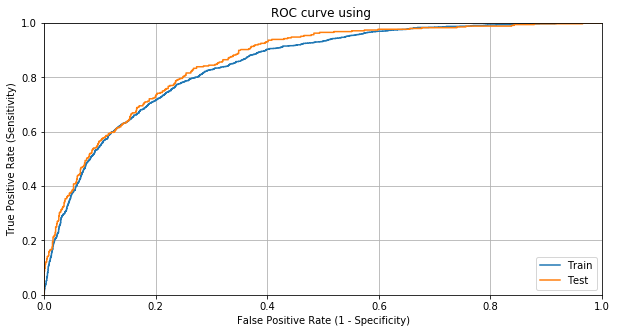

In [70]:
# Generate ROC
plt.subplots(figsize=(10, 5))
train_prob2 = final_mod2.predict_proba(x_train)[:, 1]
test_prob2 = final_mod2.predict_proba(x_test)[:, 1]

plot_roc_curve(y_train, train_prob2,
               y_test, test_prob2)

In [76]:
#Scikit Optimize

# set up hyperparameter space
space = [Integer(1, 10, name='C'),
         #Integer(8, 256, name='n_estimators'),
         Categorical(['balanced', None], name='class_weight'),
         Categorical(['newton-cg', 'lbfgs', 'sag','saga'], name='solver'),
         ]

regressor2 = LogisticRegression()

from sklearn.model_selection import cross_val_score

@use_named_args(space)
def objective2(**params):
    regressor.set_params(**params)
    return np.mean(cross_val_score(regressor2, x_train, y_train, cv=5, n_jobs=1, scoring='f1'))

In [77]:
reg_gp2 = gp_minimize(objective2, space, verbose=True)

print('best score: {}'.format(reg_gp2.fun))

print('best params:')
print('       C: {}'.format(reg_gp2.x[0]))
print('     class_weight: {}'.format(reg_gp2.x[1]))
print('    solver: {}'.format(reg_gp2.x[2]))

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2763
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.3002
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.2892
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.2882
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.3351
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 6 started. Evaluating

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.7500
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.7600
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.8647
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.8757
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.8138
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 46 started. Sea

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 1.0981
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 82 started. Searching for the next optimal point.
Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 1.0681
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 83 started. Searching for the next optimal point.
Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 1.1469
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 84 started. Searching for the next optimal point.
Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 1.1729
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 85 started. Searching for the next optimal point.
Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 0.9544
Function value obtained: 0.6041
Current minimum: 0.6041
Iteration No: 86 started. Sea

In [73]:
# Re-fit the model with the best parameters
final_mod3 = LogisticRegression(C=7,class_weight='None',solver='newton-cg')
final_mod3.fit(x_train,y_train)
print(classification_report(y_test,final_mod3.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.59      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [85]:
# Create first pipeline for base without reducing features.
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['newton-cg', 'lbfgs', 'sag','saga']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  2.0min finished


In [86]:
print(classification_report(y_test,best_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.59      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409

